# Praca domowa 6

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

## Opis zbioru danych

W celu wykonania pracy domowej 6 będziemy korzystać ze zbioru danych ze strony https://www.kaggle.com/datasets/keremabdullahoglu/laptop-price-dataset-april-2024?resource=download&select=cleaned.csv. Zbiór ten zawiera dane dotyczące ceny laptopów w zależności od różnych parametrów, w sczególności od marki, opisu laptopa, długości przekątnej ekranu, pamięci operacyjnej, CPU i GPU, rodzaju GPU, rozdzielczości ekranu i stanu laptopa. Ramka danych zawiera 2952 wierszy. Wszystkie zmienne oprócz rozmiaru ekranu i ceny są jakościowe.

In [54]:
df = pd.read_csv("cleaned.csv")
df.shape[0]
df.dtypes

Brand                   object
Product_Description     object
Screen_Size            float64
RAM                     object
Processor               object
GPU                     object
GPU_Type                object
Resolution              object
Condition               object
Price                  float64
dtype: object

## Analiza zmiennych

In [19]:
# Ogólna analiza
df.describe()

,Screen_Size,Price
count,2952.000000,2952.000000
mean,14.550237,517.552805
std,1.175322,235.592872
min,10.000000,0.000000
25%,14.000000,325.990000
50%,14.000000,489.990000
75%,15.600000,699.000000
max,18.000000,999.990000


In [61]:
# Mediana przekątnej ekranu i ceny
df.loc[:, ["Screen_Size", "Price"]].agg("median")

Screen_Size     14.00
Price          489.99
dtype: float64

In [51]:
# Moda przekątnej ekranu i ceny
df.loc[:, ["Screen_Size", "Price"]].agg("mode")

,Screen_Size,Price
0,14.0,499.99


In [66]:
# 10 najdroższych laptopów
df.sort_values(by = "Price", ascending = False).reset_index(drop = True).head(10)

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
0,Lenovo,Lenovo ThinkPad X1 Carbon Gen 11 14 2023 FHD+ ...,14.0,16,Intel Core i7 13th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1200,Excellent - Refurbished,999.99
1,Dell,"Dell Gaming G15 5510 15.6"" 512GB SSD Core i7-1...",15.6,16,Intel Core i5 10th Gen.,NVIDIA GeForce RTX 3060,Dedicated Graphics,1920 x 1080,New,999.99
2,Dell,Dell Precision 7680 Laptop i7-13850HX 512GB 64...,15.6,64,Intel Core i7 13th Gen.,"NVIDIA RTX A1000, 6 GB GDDR6",Dedicated Graphics,1920 x 1200,Excellent - Refurbished,999.99
3,HP,"HP Elite Dragonfly G4 13.5"" Blue 2023 2023 i5-...",13.5,16,Intel Core i5 13th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1280,Excellent - Refurbished,999.99
4,MSI,"MSI Katana GF66 15.6in (1TB SSD, Intel Core i9...",15.6,16,Intel Core i9 12th Gen.,NVIDIA GeForce RTX 3070,Dedicated Graphics,1920 x 1080,Open box,999.99
5,Dell,Dell Latitude 5520 i7-1165G7 512GB PCIe 16GB C...,15.6,16,Intel Core i7 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,Excellent - Refurbished,999.99
6,MSI,"MSI Summit E14 A11SCS-088 14"" Gaming i7-1185G7...",14.0,16,Intel Core i7 11th Gen.,Nvidia GTX 1650 TI 4GB,NaN,3840 x 2160,Open box,999.99
7,Dell,Dell Latitude 7440 i5-1345U 16GB 256GB BT5 WiF...,14.0,16,Intel Core i7 13th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1200,Open box,999.99
8,Dell,Dell Precision 7780 Laptop i7-13850HX 1TB PCIe...,17.3,16,Intel Core i7 13th Gen.,NVIDIA RTX A1000 6GB GDDR6,Dedicated Graphics,1920 x 1200,Excellent - Refurbished,999.99
9,MSI,"MSI Stealth 15M A11SEK-210 - 15.6"" 144 Hz - In...",15.6,16,Intel Core i7 11th Gen.,NVIDIA GeForce RTX 2060 Max-Q,Dedicated Graphics,1920 x 1080,Open box,999.99


In [63]:
# Wszystkie marki ze zbioru danych
df.Brand.unique()

array(['Lenovo', 'Dell', 'HP', 'Microsoft', 'Asus', 'Razer', 'MSI',
       'Apple', 'Panasonic', 'LG', 'Samsung', 'Acer', 'Gateway', 'Huawei',
       'Getac', 'Google', 'Dell Inc.', 'Chuwi', 'Sony', 'ByteSpeed',
       'Eurocom', 'Gigabyte', 'AVITA', 'Intel', 'Ruggon'], dtype=object)

## Analiza zmiennych w zależności od przynależności do grupy

In [74]:
# Średnia przekątna ekranu w zależności od rodzaju GPU
df.groupby("GPU_Type")[["Screen_Size"]].agg("mean")

,Screen_Size
GPU_Type,
Dedicated Graphics,15.465843
Integrated,15.800000
Integrated/On-Board Graphics,14.390905
Intel Iris Xe Graphics,14.000000
Intel UHD Graphics,14.000000
Intel® UHD Graphics,15.600000
Intergrated Intel UHD Graphics,15.600000
Iris Xe Graphics,14.000000


In [75]:
# Największa cena w zależności od marki
df.groupby("Brand")[["Price"]].agg("max")

,Price
Brand,
AVITA,559.97
Acer,981.00
Apple,729.99
Asus,999.95
ByteSpeed,199.99
Chuwi,269.99
Dell,999.99
Dell Inc.,239.99
Eurocom,800.00


In [76]:
# Średnia cena w zależności od stanu
df.groupby("Condition")[["Price"]].agg("mean")

,Price
Condition,
Excellent - Refurbished,540.699430
Good - Refurbished,364.450870
New,587.906339
Open box,584.096228
Very Good - Refurbished,406.802714


In [77]:
# Najmniejsza przekątna ekranu w zależności od CPU
df.groupby("Processor")[["Screen_Size"]].agg("min")

,Screen_Size
Processor,
AMD Ryzen 3 3000 Series,14.0
AMD Ryzen 3 4000 Series,14.0
AMD Ryzen 5 3000 Series,15.6
AMD Ryzen 5 5000 Series,14.0
AMD Ryzen 5 6000 Series,13.3
AMD Ryzen 5 7000 Series,14.0
AMD Ryzen 7 4000 Series,15.6
AMD Ryzen 7 5000 Series,14.0
AMD Ryzen 7 6000 Series,15.6


## Wykresy rozkładu zmiennych

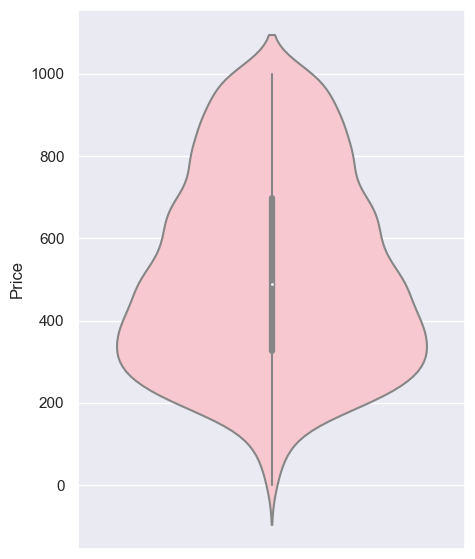

In [105]:
# Ogólny wykres rozkładu ceny
plt.figure(figsize=(5,7))
sns.violinplot(data = df, y = "Price", color = "pink")
plt.show()

Z wykresu powyżej widzimy, że blisko połowa laptopów kosztuje od 300\\$ do 700\\$. Laptopów tańszych od 300\\$ jest jednak więcej niż laptopów droższych od 700\\$.  

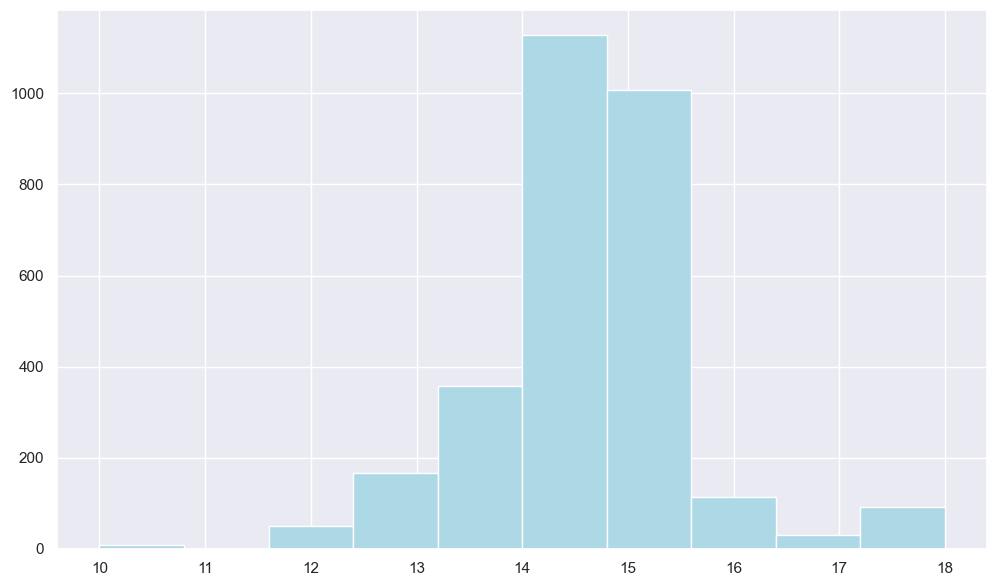

In [109]:
# Histogram przekątnej ekranu
num_bins = 10
plt.hist(df.Screen_Size, num_bins, color = "lightblue")
plt.show()

Z histogramu powyżej możemy wywnioskować, że przekątna ekranu większości laptopów wynosi pomiędzy 14 a 16 cali. Jest jednak nieznaczna liczba laptopów z przekątną aż do 18 cali.

## Wykresy zależności

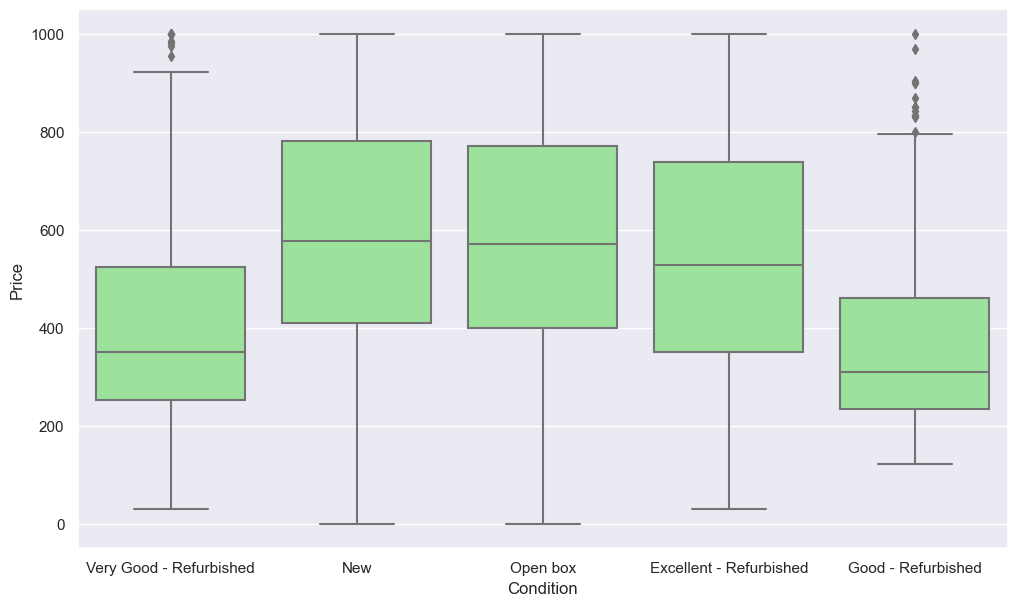

In [103]:
# Wykres rozkładu ceny w zależności od stanu laptopa
sns.boxplot(data = df, x = "Condition", y = "Price", color = "lightgreen")
plt.show()

Na podstawie powyższego wykresu możemy wywnioskować, że nowe laptopy w ogólnym przypadku są o wiele droższe, niż używane. Jednak jeśli używany laptop został znakomicie odnowiony, to jego cena często nie różni się w znaczący sposób od ceny nowych laptopów.

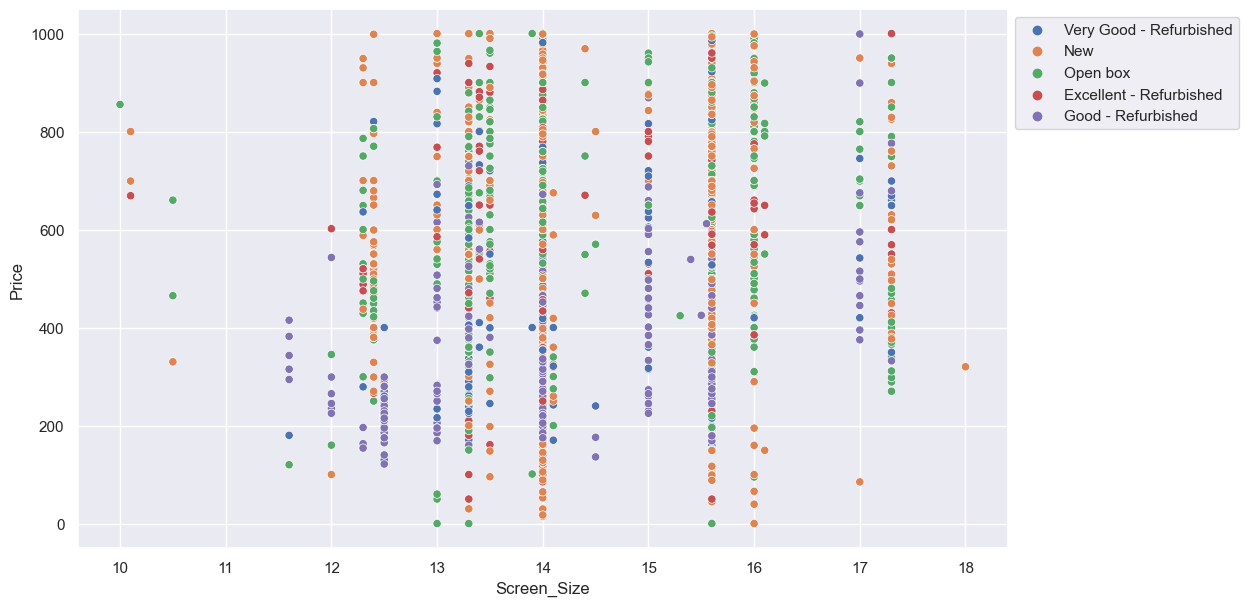

In [122]:
# Wykres zależności ceny od przekątnej ekranu z podziałem na stan laptopa
sns.scatterplot(data = df, x = "Screen_Size", y = "Price", hue = "Condition")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Możemy zauważyć, że nie ma oczywistej zależności pomiędzy przekątną a ceną laptopa. Cena laptopa bardziej zależy od jego stanu niż od długości przekątnej. 